In [4]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
import pandas as pd
import numpy as np
from cnp.experiment import WorkingDirectory, generate_root
import os
import matplotlib.pyplot as plt
import matplotlib

os.chdir('/home/james/code/kernelcnp')


In [6]:
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.rcParams['figure.dpi'] = 100 

/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
models = ["GNP", 'ANP', "AGNP", "convGNP", "convNP", "FullConvGNP"]
colours = ["tab:blue", "tab:orange", "tab:purple", "tab:olive", "tab:red", "tab:green"]
datas = ["eq", "matern", "noisy-mixture", "noisy-mixture-slow", "sawtooth", "weakly-periodic", "weakly-periodic-slow"]
markers = ["o", "x", "s"]
covs = ["innerprod-homo", "kvv-homo", "meanfield"]
seeds = ['0']
dims = ['1']



/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
mean_field_models = ['ANP', 'convNP', 'FullConvGNP']


/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
experiments = []
row_labels = []
column_labels = []
for m, colour in zip(models, colours):
    for d in datas:
        for s in seeds:
            for dim in dims:
                for c, marker in zip(covs, markers):
                    if m in mean_field_models and c != "meanfield":
                        pass
                    else:          
                        experiment_name = os.path.join('_experiments', 
                                                    f'{d}',
                                                    'models', 
                                                    f'{m}',
                                                    f'{c}',
                                                    f'seed-{s}',
                                                    f'dim-{dim}')

                        wd = WorkingDirectory(root=experiment_name, print_root=False)
                        experiments.append((d, m, c, s, colour, marker, wd.root, dim ))
                
row_labels.append("Oracle-GP")
                
for m in models:
    for c in covs:
        if m in mean_field_models and c != "meanfield":
            continue
        else:
            row_labels.append(f'{m}-{c}')
        

for d in datas:
    column_labels.append(f'{d}')
    column_labels.append(f'{d}-error')
    column_labels.append(f'{d}-iterations')
    column_labels.append(f'{d}-num-params')

column_labels.append("marker")
column_labels.append("colour")


# Create an empty dataframe
df = pd.DataFrame(index=row_labels, columns=column_labels)

/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
for d in datas:
    experiment_name = os.path.join('_experiments/toy-results', 
                                   f'{d}',
                                   'models', 
                                   'Oracle-GP/seed-0/dim-1')

    wd = WorkingDirectory(root=experiment_name, print_root=False)
    if os.path.isfile(os.path.join(wd.root, 'test_log_likelihood.txt')):
        mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                                exists=True))/np.sqrt(2048)
        df.at["Oracle-GP", f'{d}'] = mean
        df.at["Oracle-GP", f'{d}-error'] = error
    else:
        print(f'No results {wd.root}')

No results _experiments/toy-results/sawtooth/models/Oracle-GP/seed-0/dim-1
/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
for e in experiments:
    d, m, c, s, colour, marker, r, dim = e
    row_label = f'{m}-{c}'
    experiment_name = os.path.join('_experiments/toy-results', 
                                               f'{d}',
                                               'models', 
                                               f'{m}',
                                               f'{c}',
                                               f'seed-{s}',
                                               f'dim-{dim}')

    wd = WorkingDirectory(root=experiment_name, print_root=False)
    if os.path.isfile(os.path.join(wd.root, 'test_log_likelihood.txt')):
        mean = -np.loadtxt(wd.file('test_log_likelihood.txt', 
                                exists=True))
        error = np.loadtxt(wd.file('test_log_likelihood_standard_error.txt',
                                exists=True))
        num_params = np.loadtxt(wd.file('num_params.txt',
                                exists=True))
        
        df.at[row_label, f'{d}-num-params'] = num_params
        
        df.at[row_label, f'{d}'] = mean
        df.at[row_label, f'{d}-error'] = error
        df.at[row_label, 'colour'] = colour
        df.at[row_label, 'marker'] = marker
    else:
        print(f'No results {wd.root}')
    
    if os.path.isfile(os.path.join(wd.root, 'last_epoch.txt')):
        iteration = np.loadtxt(wd.file('last_epoch.txt',
                                    exists=True))
        df.at[row_label, f'{d}-iterations'] = iteration



No results _experiments/toy-results/noisy-mixture-slow/models/GNP/kvv-homo/seed-0/dim-1
No results _experiments/toy-results/weakly-periodic-slow/models/GNP/kvv-homo/seed-0/dim-1
No results _experiments/toy-results/noisy-mixture-slow/models/AGNP/kvv-homo/seed-0/dim-1
No results _experiments/toy-results/weakly-periodic-slow/models/AGNP/kvv-homo/seed-0/dim-1
No results _experiments/toy-results/noisy-mixture-slow/models/convGNP/kvv-homo/seed-0/dim-1
No results _experiments/toy-results/weakly-periodic-slow/models/convGNP/kvv-homo/seed-0/dim-1
No results _experiments/toy-results/noisy-mixture-slow/models/convNP/meanfield/seed-0/dim-1
No results _experiments/toy-results/weakly-periodic-slow/models/convNP/meanfield/seed-0/dim-1
/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that ha

In [31]:
df

/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,eq,eq-error,eq-iterations,eq-num-params,matern,matern-error,matern-iterations,matern-num-params,noisy-mixture,noisy-mixture-error,...,weakly-periodic,weakly-periodic-error,weakly-periodic-iterations,weakly-periodic-num-params,weakly-periodic-slow,weakly-periodic-slow-error,weakly-periodic-slow-iterations,weakly-periodic-slow-num-params,marker,colour
Oracle-GP,1.414271,0.001038,NaN,NaN,1.279832,0.000069,NaN,NaN,1.087327,0.000139,...,0.67232,0.000178,NaN,NaN,0.683115,0.000177,NaN,NaN,NaN,NaN
GNP-innerprod-homo,1.183802,0.0006359027677873703,101.0,182146.0,0.978026,0.000610650842974128,101.0,182146.0,0.417992,0.0005542664007041764,...,-1.173808,0.0010688621515438329,101.0,182146.0,-1.231584,0.0013996022066089433,101.0,182146.0,o,tab:blue
GNP-kvv-homo,1.154148,0.0003894712726489343,72.0,182276.0,0.955617,0.0005000316279640252,101.0,182276.0,0.456335,0.0004974598732696764,...,-0.837086,0.001276974092249642,101.0,182276.0,NaN,NaN,NaN,NaN,x,tab:blue
GNP-meanfield,-0.59716,0.007741244705015252,101.0,116226.0,-0.723126,0.006836481385471999,101.0,116226.0,-1.434526,0.0029183303362837264,...,-1.249868,0.0017312500874913852,101.0,116226.0,-1.696878,0.04265311519821902,101.0,116226.0,s,tab:blue
ANP-meanfield,0.729315,0.0034253277409257567,101.0,889090.0,0.233139,0.0021156940346036034,101.0,889090.0,-0.786052,0.0027649622741309442,...,-0.473293,0.007573913465142745,101.0,889090.0,-1.390346,0.0039195714283548535,101.0,889090.0,s,tab:orange
AGNP-innerprod-homo,1.353288,0.0023872688331895726,101.0,805890.0,1.23336,0.003671044343832447,101.0,805890.0,0.149062,0.009122289761402391,...,-1.186828,0.0010456686321801373,101.0,805890.0,-0.957177,0.015283530951018993,101.0,805890.0,o,tab:purple
AGNP-kvv-homo,1.346783,0.0025557856420991274,101.0,806020.0,1.238264,0.003555759796560923,101.0,806020.0,0.747768,0.005350566710649009,...,-0.313205,0.007690804663837512,101.0,806020.0,NaN,NaN,NaN,NaN,x,tab:purple
AGNP-meanfield,1.0527,0.01291343846600215,101.0,739970.0,0.851046,0.01352531936032717,101.0,739970.0,-1.523546,0.001915091534619803,...,-0.480268,0.009546717451211913,101.0,739970.0,-1.545697,0.002505551909393675,101.0,739970.0,s,tab:purple
convGNP-innerprod-homo,1.455869,0.001914145151077972,101.0,55300.0,1.30766,0.0038461064669656803,101.0,55300.0,0.643826,0.02059754337257157,...,-0.254221,0.008031150986419456,101.0,55300.0,-8.35266,0.18232318676469428,101.0,55300.0,o,tab:olive
convGNP-kvv-homo,1.458419,0.00196630634445653,101.0,55310.0,1.350843,0.0030384535778417167,101.0,55310.0,1.107366,0.0068434437103372155,...,0.276906,0.004311567587903791,101.0,55310.0,NaN,NaN,NaN,NaN,x,tab:olive


In [32]:
df['sawtooth']

/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oracle-GP                      NaN
GNP-innerprod-homo       -0.155809
GNP-kvv-homo              0.030391
GNP-meanfield            -0.155972
ANP-meanfield            -0.155605
AGNP-innerprod-homo      -0.155604
AGNP-kvv-homo            -0.902479
AGNP-meanfield           -0.155658
convGNP-innerprod-homo    1.355801
convGNP-kvv-homo          2.281394
convGNP-meanfield         2.211765
convNP-meanfield          1.581517
FullConvGNP-meanfield      1.68941
Name: sawtooth, dtype: object

In [33]:
def plot_results(d, df):
    plt.xticks([])
    x = np.arange(len(df[d]))
    ones = np.ones_like(x)
    y = df[d]
    e = df[d + '-error']
    oracle_result = df[d]["Oracle-GP"]
    oracle_error = df[d + "-error"]["Oracle-GP"]
    label = df.index
    colour = df['colour'].tolist()
    marker = df['marker'].tolist()
    
    
    for i in range(1, len(x)):
        plt.errorbar(x[i], y[i], e[i], marker=marker[i], color=colour[i], label=label[i])

    plt.plot(x, oracle_result * ones, label='Oracle-GP', color='k')
    plt.fill_between(x,
                     (oracle_result + oracle_error) * ones,
                     (oracle_result - oracle_error) * ones,
                     color='k', alpha=0.1)



    plt.legend( ncol=2 ,bbox_to_anchor=(1, 0))
    plt.title(d)
    plt.show()


/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/james/anaconda3/envs/kernelcnp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


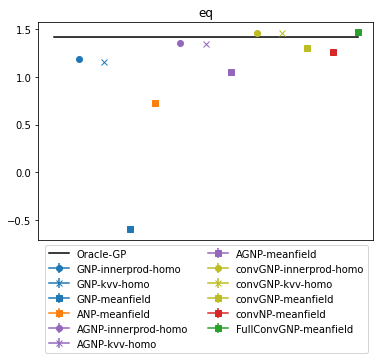

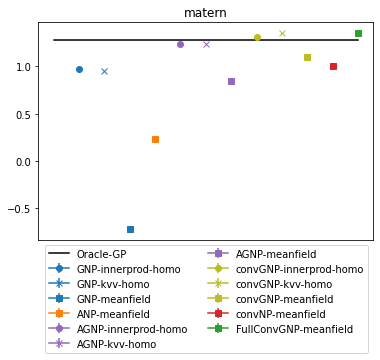

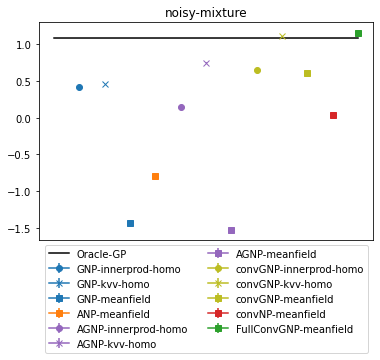

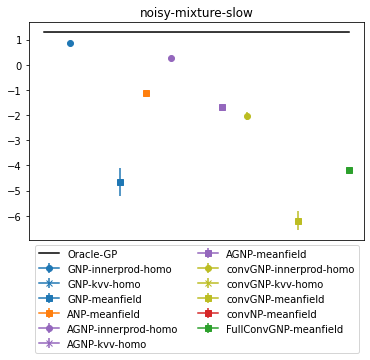

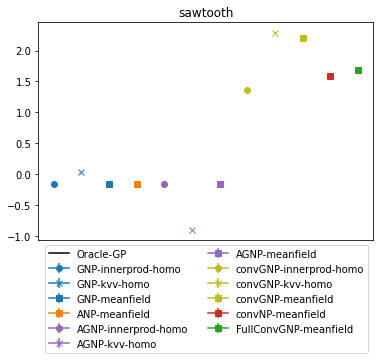

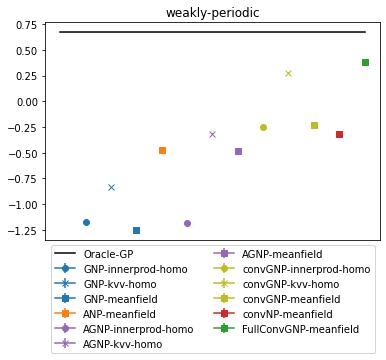

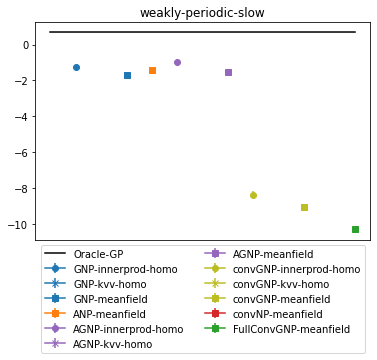

In [34]:
for d in datas:
    plot_results(d, df)